# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):                                            
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(query_url)
        city_weather = city_response.json()  #Json to python objects
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather['dt']

          # Append the City information into city_data list
        city_data.append({  "City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | angoche
Processing Record 4 of Set 1 | khorramshahr
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | virginia beach
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | eureka
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | phan thiet
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | bay roberts
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | tou

City not found. Skipping...
Processing Record 36 of Set 4 | koumac
Processing Record 37 of Set 4 | butaritari
Processing Record 38 of Set 4 | beeville
Processing Record 39 of Set 4 | mangan
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | yumen
Processing Record 42 of Set 4 | santa luzia
Processing Record 43 of Set 4 | thinadhoo
Processing Record 44 of Set 4 | arkhangelskoye
Processing Record 45 of Set 4 | shuyskoye
Processing Record 46 of Set 4 | maniitsoq
Processing Record 47 of Set 4 | satitoa
City not found. Skipping...
Processing Record 48 of Set 4 | karlstad
Processing Record 49 of Set 4 | atar
Processing Record 0 of Set 5 | gaffney
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | san andres
Processing Record 4 of Set 5 | boyolangu
Processing Record 5 of Set 5 | minuri
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8

Processing Record 27 of Set 8 | puerto carreno
Processing Record 28 of Set 8 | itarema
Processing Record 29 of Set 8 | charcas
Processing Record 30 of Set 8 | krasnyy chikoy
Processing Record 31 of Set 8 | ashqelon
Processing Record 32 of Set 8 | yanan
City not found. Skipping...
Processing Record 33 of Set 8 | kholmogory
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | acajutla
Processing Record 36 of Set 8 | sao felix do xingu
Processing Record 37 of Set 8 | sitges
Processing Record 38 of Set 8 | viligili
City not found. Skipping...
Processing Record 39 of Set 8 | nuevitas
Processing Record 40 of Set 8 | manicore
Processing Record 41 of Set 8 | payo
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | olga
Processing Record 45 of Set 8 | hirara
Processing Record 46 of Set 8 | sur
Processing Record 47 of Set 8 | korla
Processing Record 48 of Set 8 | dimbokro
Processing Record 49 of Set 8 | yerbogachen
Pro

Processing Record 18 of Set 12 | nantucket
Processing Record 19 of Set 12 | laredo
Processing Record 20 of Set 12 | coachella
Processing Record 21 of Set 12 | goudomp
City not found. Skipping...
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | coihaique
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | vanavara
Processing Record 26 of Set 12 | kaoma
Processing Record 27 of Set 12 | whitehorse
Processing Record 28 of Set 12 | pitimbu
Processing Record 29 of Set 12 | hualmay
Processing Record 30 of Set 12 | marrakesh
Processing Record 31 of Set 12 | saint-georges
Processing Record 32 of Set 12 | liepaja
Processing Record 33 of Set 12 | shimoda
Processing Record 34 of Set 12 | woodward
Processing Record 35 of Set 12 | nosy varika
Processing Record 36 of Set 12 | vandoeuvre-les-nancy
Processing Record 37 of Set 12 | grand gaube
Processing Record 38 of Set 12 | cassilandia
Processing Record 39 of Set 12 | bilibino
Processing Record 40 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,281.96,76,75,2.06,AR,1682210962
1,guerrero negro,27.9769,-114.0611,292.18,56,0,7.86,MX,1682211154
2,angoche,-16.2325,39.9086,296.60,84,18,2.70,MZ,1682211277
3,khorramshahr,30.4397,48.1664,296.13,68,0,1.03,IR,1682211359
4,cherskiy,68.7500,161.3000,273.87,96,100,1.47,RU,1682211128


In [8]:
#Kelvin to Celsius conversion  Celsius = Kelvin -273.15
city_data_df['Max Temp']  = city_data_df['Max Temp']-273.15
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,8.81,76,75,2.06,AR,1682210962
1,guerrero negro,27.9769,-114.0611,19.03,56,0,7.86,MX,1682211154
2,angoche,-16.2325,39.9086,23.45,84,18,2.70,MZ,1682211277
3,khorramshahr,30.4397,48.1664,22.98,68,0,1.03,IR,1682211359
4,cherskiy,68.7500,161.3000,0.72,96,100,1.47,RU,1682211128
...,...,...,...,...,...,...,...,...,...
560,kerchevskiy,59.9460,56.2884,1.87,88,45,1.95,RU,1682211552
561,huaicheng,23.9051,112.1931,23.52,96,100,0.74,CN,1682211552
562,huangpi,30.8845,114.3779,9.06,93,100,3.00,CN,1682211488
563,odweyne,9.4092,45.0640,24.51,57,100,3.33,SO,1682211143


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,8.81,76,75,2.06,AR,1682210962
1,guerrero negro,27.9769,-114.0611,19.03,56,0,7.86,MX,1682211154
2,angoche,-16.2325,39.9086,23.45,84,18,2.70,MZ,1682211277
3,khorramshahr,30.4397,48.1664,22.98,68,0,1.03,IR,1682211359
4,cherskiy,68.7500,161.3000,0.72,96,100,1.47,RU,1682211128


In [11]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,8.81,76,75,2.06,AR,1682210962
1,guerrero negro,27.9769,-114.0611,19.03,56,0,7.86,MX,1682211154
2,angoche,-16.2325,39.9086,23.45,84,18,2.70,MZ,1682211277
3,khorramshahr,30.4397,48.1664,22.98,68,0,1.03,IR,1682211359
4,cherskiy,68.7500,161.3000,0.72,96,100,1.47,RU,1682211128
...,...,...,...,...,...,...,...,...,...
560,kerchevskiy,59.9460,56.2884,1.87,88,45,1.95,RU,1682211552
561,huaicheng,23.9051,112.1931,23.52,96,100,0.74,CN,1682211552
562,huangpi,30.8845,114.3779,9.06,93,100,3.00,CN,1682211488
563,odweyne,9.4092,45.0640,24.51,57,100,3.33,SO,1682211143


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

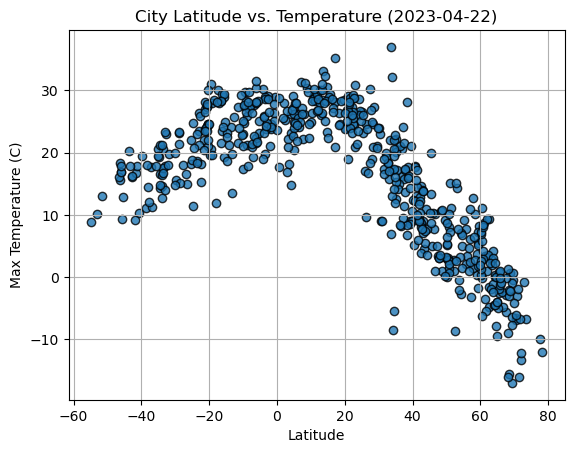

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Show the labels and title
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
 # Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

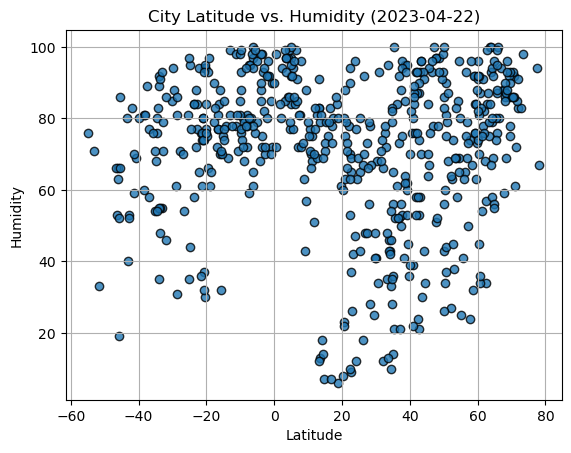

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Show the labels and title
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")
           
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

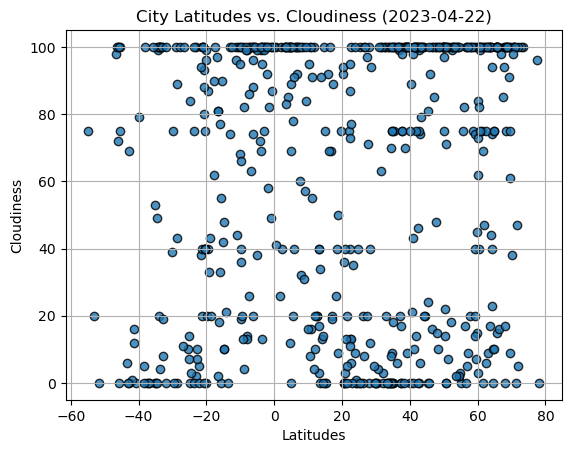

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

#Show the labels and title
plt.title("City Latitudes vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

#Show plot
plt.show()

In [ ]:
city_data_df

#### Latitude vs. Wind Speed Plot

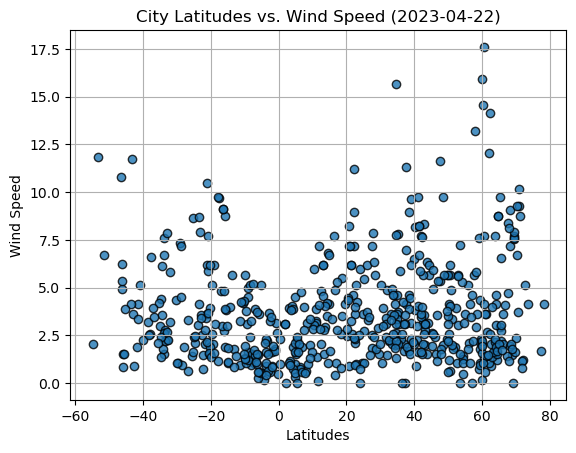

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

#Show the labels and title
plt.title("City Latitudes vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed")
plt.grid(True)

 # Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,guerrero negro,27.9769,-114.0611,19.03,56,0,7.86,MX,1682211154
3,khorramshahr,30.4397,48.1664,22.98,68,0,1.03,IR,1682211359
4,cherskiy,68.7500,161.3000,0.72,96,100,1.47,RU,1682211128
5,thompson,55.7435,-97.8558,2.09,41,75,5.14,CA,1682211131
6,barrow,71.2906,-156.7887,-15.99,72,0,8.75,US,1682211110


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,8.81,76,75,2.06,AR,1682210962
2,angoche,-16.2325,39.9086,23.45,84,18,2.70,MZ,1682211277
8,hermanus,-34.4187,19.2345,16.59,83,99,6.13,ZA,1682211115
12,bredasdorp,-34.5322,20.0403,14.32,80,49,3.55,ZA,1682210958
14,east london,-33.0153,27.9116,17.87,55,100,2.23,ZA,1682210957


###  Temperature vs. Latitude Linear Regression Plot

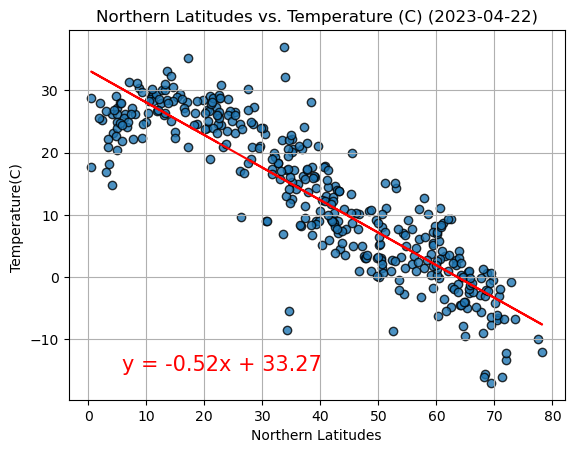

PearsonRResult(statistic=-0.88980618370947, pvalue=3.226705442200042e-132)


In [26]:
# Linear regression on Northern Hemisphere
# Build the scatter plots for latitude vs. Temperature
plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Labels and Grid
plt.title("Northern Latitudes vs. Temperature (C) (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Northern Latitudes")
plt.ylabel("Temperature(C) ")
plt.grid(True)

#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"] )
regress_values = (northern_hemi_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(5.8,-15),fontsize=15,color="red")

# Show plot and Pearson r
plt.show()
correlation = st.pearsonr((northern_hemi_df["Lat"]),northern_hemi_df["Max Temp"])
print(correlation)

PearsonRResult(statistic=0.6908692852478062, pvalue=5.205864849522936e-27)


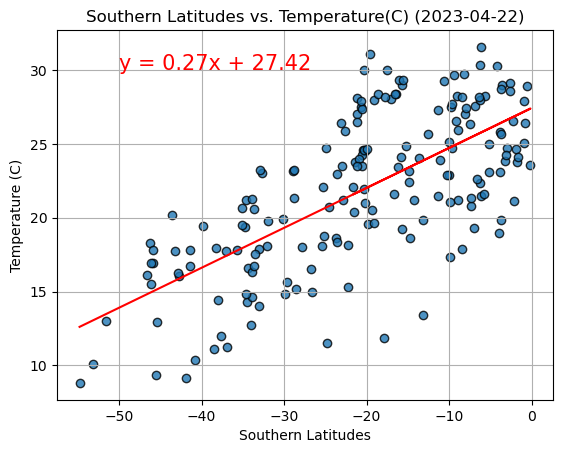

In [25]:
# Linear regression on Southern Hemisphere
plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Labels and Grid
plt.title("Southern Latitudes vs. Temperature(C) (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Southern Latitudes")
plt.ylabel("Temperature (C)")
plt.grid(True)

#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"] )
regress_values = (southern_hemi_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

#Show Pearson r
correlation = st.pearsonr((southern_hemi_df["Lat"]),southern_hemi_df["Max Temp"])
print(correlation)

# Show plot 
plt.show()

There is a strong inverse relationship between the Northern Latitudes and Temperature. As one goes from the equator north, the temperature drops. This is seen by a well grouped scatter plot and a strong r relationship with a significan p value. There is a strong positive relationship between Temperature and Southern Latitudes, although not as strong as the Northern Hemisphere. However, the r value is over 0.5 and the p value is significant.

### Humidity vs. Latitude Linear Regression Plot

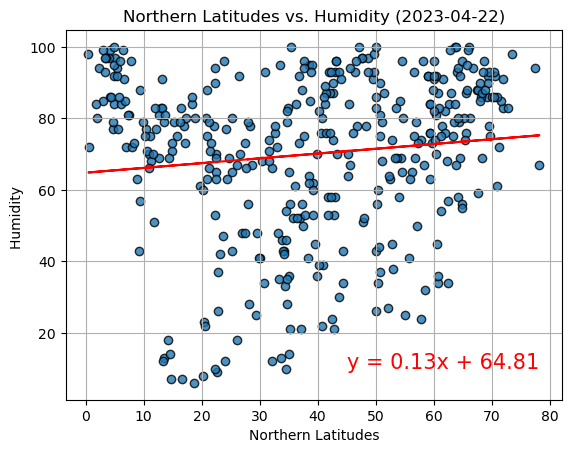

PearsonRResult(statistic=0.1185620705262091, pvalue=0.020127594795462573)


In [30]:
# Northern Hemisphere
plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

#Labels and Grid
plt.title("Northern Latitudes vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Northern Latitudes")
plt.ylabel("Humidity ")
plt.grid(True)

#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"] )
regress_values = (northern_hemi_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Show Pearson r
plt.show()
correlation = st.pearsonr((northern_hemi_df["Lat"]),northern_hemi_df["Humidity"])
print(correlation)

# Show plot 
plt.show()

PearsonRResult(statistic=0.4078343904617109, pvalue=1.2082482209979393e-08)


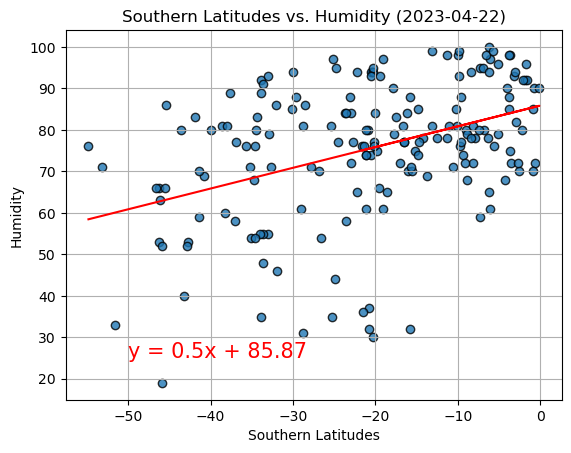

In [33]:
# Southern Hemisphere
plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Labels and Grid
plt.title("Southern Latitudes vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Southern Latitudes")
plt.ylabel("Humidity")
plt.grid(True)

#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"] )
regress_values = (southern_hemi_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

#Show Pearson r
correlation = st.pearsonr((southern_hemi_df["Lat"]),southern_hemi_df["Humidity"])
print(correlation)

# Show plot 
plt.show()

There is a weak relationship between the Northern Latitudes and Humidity as seen by a relatively flat regression line and a r value of 0.12 with an insignificant p value. The Southern Latitudes show a moderate relationship between Latitude and Humidity as shown by a moderate slope and a r value of 0.41 with a significant p value.

### Cloudiness vs. Latitude Linear Regression Plot

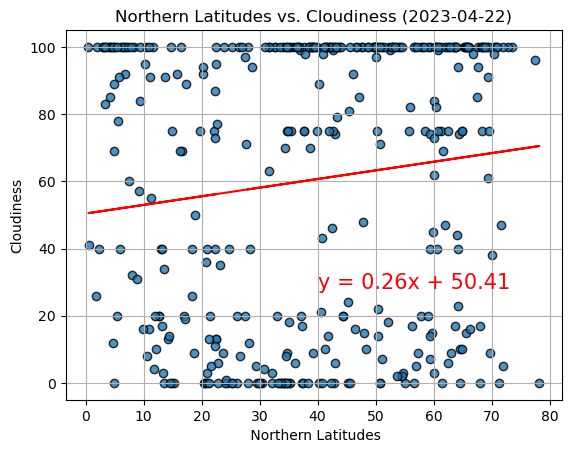

PearsonRResult(statistic=0.12691553587010598, pvalue=0.012810618418793059)


In [35]:
# Northern Hemisphere
plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Labels and Grid
plt.title("Northern Latitudes vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel(" Northern Latitudes")
plt.ylabel("Cloudiness")
plt.grid(True)

#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"] )
regress_values = (northern_hemi_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(40,28),fontsize=15,color="red")

# Show Pearson r
plt.show()
correlation = st.pearsonr((northern_hemi_df["Lat"]),northern_hemi_df["Cloudiness"])
print(correlation)

# Show plot 
plt.show()


PearsonRResult(statistic=0.28956627914854954, pvalue=7.69299750074799e-05)


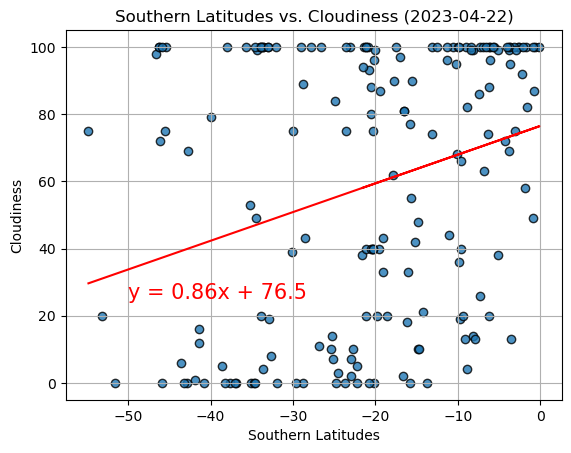

In [37]:
# Southern Hemisphere
plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Labels and Grid
plt.title("Southern Latitudes vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Southern Latitudes")
plt.ylabel("Cloudiness")
plt.grid(True)


#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"] )
regress_values = (southern_hemi_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

#Show Pearson r
correlation = st.pearsonr((southern_hemi_df["Lat"]),southern_hemi_df["Cloudiness"])
print(correlation)

# Show plot 
plt.show()

The Northern Latitudes and Cloudiness are not well correlated as shown by a flat slope and an insignificant p value of 0.13. The Southern Latitudes show a mild correlation with moderate slope and a r value of 0.29 with a significant p value.

### Wind Speed vs. Latitude Linear Regression Plot

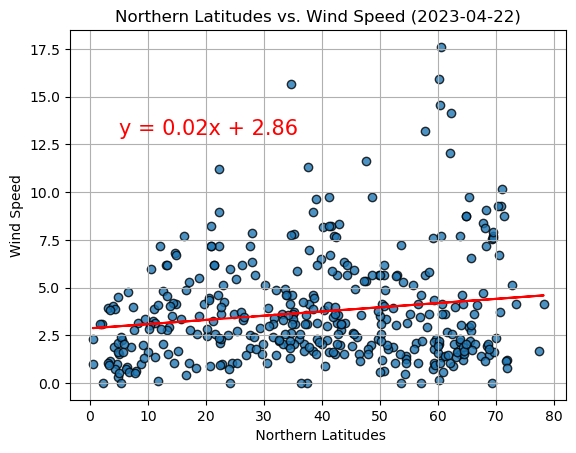

PearsonRResult(statistic=0.15999407641466973, pvalue=0.0016591952290881296)


In [45]:
# Northern Hemisphere
plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Labels and Grid
plt.title("Northern Latitudes vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel(" Northern Latitudes")
plt.ylabel("Wind Speed")
plt.grid(True)


#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"] )
regress_values = (northern_hemi_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(5,13),fontsize=15,color="red")

# Show plot and Pearson r
plt.show()
correlation = st.pearsonr((northern_hemi_df["Lat"]),northern_hemi_df["Wind Speed"])
print(correlation)

PearsonRResult(statistic=-0.31980620786348213, pvalue=1.1410758899594541e-05)


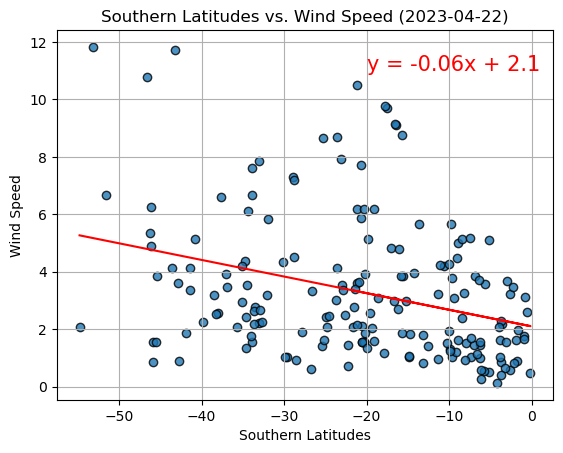

In [40]:
# Southern Hemisphere
plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
#Labels and Grid
plt.title("Southern Latitudes vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Southern Latitudes")
plt.ylabel("Wind Speed")
plt.grid(True)

#Regression stats and plot line
(slope, intercept, rvalue, pvalue, stderr) =linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"] )
regress_values = (southern_hemi_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(-20,11),fontsize=15,color="red")

#Show Pearson r
correlation = st.pearsonr((southern_hemi_df["Lat"]),southern_hemi_df["Wind Speed"])
print(correlation)

# Show plot 
plt.show()

There is little relationship between Northern Latitudes and Wind Speed as shown by a relatively flat slope and a r value of 0.16. There is a mild relationship between Southern Latitudes and Wind Speed as shown by mild slope, but a -0.32 r value with a significant p value. It mildly states as the Latitude decreases, wind speed increases, however the overall graph only shows a difference of 3.